Name:  

    Prepare_input_aac

Purpose:  

    Created input files for libradtran based on the calipso, global Aerosol over Clouds
    For MeloÃ«'s study

Calling Sequence:

    python Prepare_input_aac
  
Input:

    none

Output:
   
    input files for libradtran 2.0 (uvspec) 
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - mplt_toolkits for basemap, map plotting
    - pdb
    - datetime
    - load_utils

  
Needed Files:

  - matlab input files: Input_to_DARF_mmm.mat

In [ ]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import scipy.io as sio
from mpl_toolkits.basemap import Basemap

In [2]:
import Run_libradtran as RL
reload(RL)

<module 'Run_libradtran' from 'Run_libradtran.pyc'>

In [3]:
fp = 'C:\Users\sleblan2\Research\Calipso\meloe/'

## Read Matlab input files

In [5]:
input_DJF = sio.loadmat(fp+'Input_to_DARF_DJF.mat',mat_dtype=True)['data_input_darf']

In [6]:
input_DJF.dtype.names

('MODIS_N',
 'MODIS_lat',
 'MODIS_lon',
 'MODIS_COD_mean',
 'MODIS_effrad_mean',
 'MODIS_COD_median',
 'MODIS_effrad_median',
 'MODIS_COD_std',
 'MODIS_Effrad_std',
 'MOC_ext_median',
 'MOC_ext_mean',
 'MOC_ssa_median',
 'MOC_ssa_mean',
 'MOC_asym_median',
 'MOC_asym_mean',
 'MOC_ext_std',
 'MOC_ssa_std',
 'MOC_asym_std',
 'MOC_wavelengths',
 'CALIOP_AAC_DR_AOD_532')

In [7]:
enumerate(input_DJF['MODIS_lat'][0,0])

In [8]:
input_DJF['MODIS_lat'][0,0].shape

(48L, 1L)

In [9]:
input_DJF['MODIS_COD_mean'][0,0][input_DJF['MODIS_COD_mean'][0,0]==-9999] = np.nan

In [21]:
ilat,ilon = 5,15

In [23]:
wvl = np.append(wvl,100000.0)

In [24]:
wvl

array([    200.05,     234.3 ,     264.8 ,     292.1 ,     310.5 ,
           340.  ,     397.5 ,     467.5 ,     546.25,     642.3 ,
           742.  ,     841.5 ,     965.5 ,    1226.  ,    1657.4 ,
          2202.4 ,    3004.4 ,    3754.4 ,    4900.  ,    5570.  ,
          6510.  ,    7570.  ,    8545.  ,    9645.  ,   11350.  ,
         13700.  ,   16700.  ,   21750.  ,   30350.  ,   50000.  ,  100000.  ])

In [27]:
ext = np.abs(input_DJF['MOC_ext_mean'][0,0][ilat,ilon,:])

In [22]:
input_DJF['MOC_ext_mean'][0,0][ilat,ilon,:]

array([ -1.45794755e+04,  -1.45862294e+04,  -1.43995713e+04,
        -1.41206954e+04,  -1.38876239e+04,  -1.34558567e+04,
        -1.25019509e+04,  -1.12874897e+04,  -9.99900000e+03,
        -8.62430556e+03,  -7.44134222e+03,  -6.48163638e+03,
        -5.53365555e+03,  -4.16191380e+03,  -2.83741474e+03,
        -1.94669412e+03,  -1.31930405e+03,  -9.77930437e+02,
        -6.56949176e+02,  -5.32493950e+02,  -4.05348870e+02,
        -3.05791508e+02,  -2.40878007e+02,  -1.87849839e+02,
        -1.32585464e+02,  -8.72149787e+01,  -5.55166687e+01,
        -3.04483327e+01,  -1.50248931e+01,  -6.47389573e+00])

In [11]:
wvl = input_DJF['MOC_wavelengths'][0,0][0,:]*1000.0

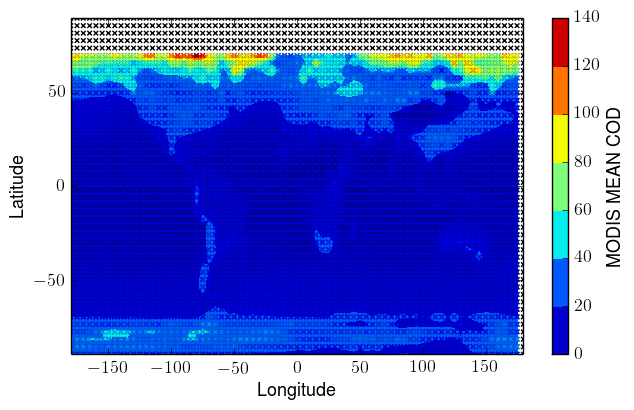

In [91]:
ctr = plt.contourf(input_DJF['MODIS_lon'][0,0][:,0],input_DJF['MODIS_lat'][0,0][:,0],input_DJF['MODIS_COD_mean'][0,0])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(ctr)
cbar.set_label('MODIS MEAN COD')
plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=11,c='k')
plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=10,c=input_DJF['MODIS_COD_mean'][0,0])
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.savefig(fp+'plots/MODIS_mean_COD_flat.png',dpi=600,transparent=True)

In [105]:
MODIS_lon[20,72]

175.0

In [104]:
input_DJF['MODIS_COD_mean'][0,0][:,72]

array([         nan,  20.97333333,  37.84      ,  39.        ,
        25.38333333,  25.47      ,  19.48      ,  16.77333333,
        15.65666667,  13.84666667,  12.94      ,  11.47      ,
        10.82333333,  15.41      ,  11.80333333,   9.28666667,
         9.95      ,   9.44      ,   8.98333333,  10.04      ,
         9.23333333,   8.76333333,   7.21333333,   6.59666667,
         8.48333333,   8.50333333,   7.38666667,   7.51666667,
         8.2       ,   9.72333333,  12.40666667,  15.75333333,
        18.93      ,  19.4       ,  20.55      ,  19.85666667,
        25.41      ,  30.17      ,  32.3373494 ,  67.5       ,
        77.78      ,  90.32835821,          nan,          nan,
                nan,          nan,          nan,          nan])

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

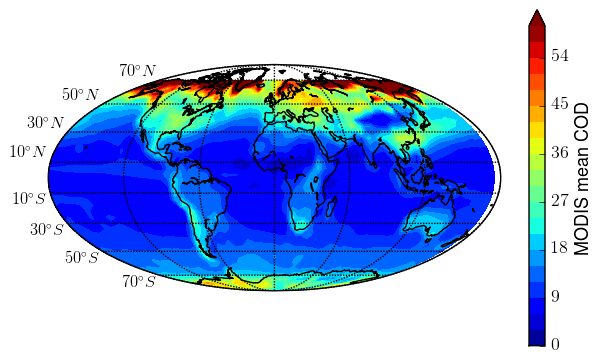

In [93]:
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,20.),labels=[1,0,0,0])
m.drawmeridians(np.arange(0.,420.,60.))
MODIS_lon, MODIS_lat = np.meshgrid(input_DJF['MODIS_lon'][0,0][:,0],input_DJF['MODIS_lat'][0,0][:,0],sparse=False)
x,y=m(MODIS_lon, MODIS_lat) 
cs = m.contourf(x,y,input_DJF['MODIS_COD_mean'][0,0],np.linspace(0,60,21),extend='max')
cbar = plt.colorbar(cs)
cbar.set_label('MODIS mean COD')
plt.savefig(fp+'plots/MODIS_mean_COD.png',dpi=600,transparent=True)

In [106]:
input_DJF['MODIS_COD_mean'][0,0][20,20]

7.6033333333333335

In [107]:
input_DJF['MODIS_effrad_mean'][0,0][20,20]

12.473333333333333

In [111]:
input_DJF['MOC_wavelengths'][0,0]

array([[  0.20005,   0.2343 ,   0.2648 ,   0.2921 ,   0.3105 ,   0.34   ,
          0.3975 ,   0.4675 ,   0.54625,   0.6423 ,   0.742  ,   0.8415 ,
          0.9655 ,   1.226  ,   1.6574 ,   2.2024 ,   3.0044 ,   3.7544 ,
          4.9    ,   5.57   ,   6.51   ,   7.57   ,   8.545  ,   9.645  ,
         11.35   ,  13.7    ,  16.7    ,  21.75   ,  30.35   ,  50.     ]])

In [113]:
print MODIS_lon[20,20],MODIS_lat[20,20]

-85.0 -14.0


In [119]:
input_DJF['MOC_asym_mean'][0,0][20,20]

array([ 0.7852096 ,  0.78103743,  0.77684837,  0.77285771,  0.77073574,
        0.767068  ,  0.76026127,  0.75438874,  0.74906518,  0.74499582,
        0.74245588,  0.7404872 ,  0.73816073,  0.73253394,  0.72113882,
        0.70217822,  0.66814234,  0.63567558,  0.58822783,  0.56218055,
        0.52791341,  0.49239392,  0.4624792 ,  0.43165396,  0.38933818,
        0.34021788,  0.28974332,  0.22683931,  0.1585286 ,  0.08400939])

In [26]:
input_mmm['MOC_wavelengths'][0,0][0,:]*1000.0

array([   200.05,    234.3 ,    264.8 ,    292.1 ,    310.5 ,    340.  ,
          397.5 ,    467.5 ,    546.25,    642.3 ,    742.  ,    841.5 ,
          965.5 ,   1226.  ,   1657.4 ,   2202.4 ,   3004.4 ,   3754.4 ,
         4900.  ,   5570.  ,   6510.  ,   7570.  ,   8545.  ,   9645.  ,
        11350.  ,  13700.  ,  16700.  ,  21750.  ,  30350.  ,  50000.  ])

In [30]:
input_mmm['MOC_ext_mean'][0,0].shape

(48L, 75L, 30L)

In [34]:
input_mmm['MODIS_effrad_mean'][0,0].shape

(48L, 75L)

In [29]:
input_mmm['MODIS_lat'][0,0].shape

(48L, 1L)

## Read sample MODIS albedo file

In [5]:
import load_utils as lm
reload(lm)

<module 'load_modis' from 'load_modis.pyc'>

In [6]:
alb_geo,alb_geo_dict = lm.load_hdf_sd('C:\Users\sleblan2\Research\Calipso\meloe\MCD43GF_geo_shortwave_001_2007.hdf')

Reading file: C:\Users\sleblan2\Research\Calipso\meloe\MCD43GF_geo_shortwave_001_2007.hdf
  MCD43GF_CMG: (('YDim:MCD43GF_30arc_second', 'XDim:MCD43GF_30arc_second'), (21600, 43200), 22, 0)
No missing_value on MCD43GF_CMG


In [7]:
alb_geo['MCD43GF_CMG'].shape

(21600L, 43200L)

In [8]:
alb_geo['MCD43GF_CMG'][1,0]

nan

In [76]:
alb_geo_dict['MCD43GF_CMG']['_FillValue']

32767

In [73]:
input_DJF['MODIS_COD_mean'][0,0].shape

(48L, 75L)

In [12]:
alb_geo_sub = np.nanmean(np.nanmean(alb_geo['MCD43GF_CMG'].reshape([48,21600/48,75,43200/75]),3),1)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\numpy\lib\nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [19]:
alb_geo_lat = np.linspace(90,-90,num=48)
alb_geo_lon = np.linspace(-180,180,num=75)

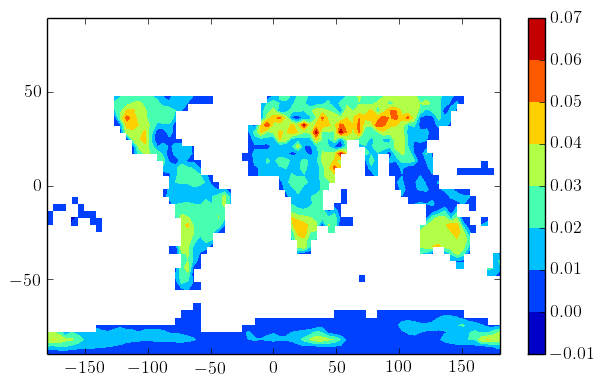

In [21]:
co = plt.contourf(alb_geo_lon,alb_geo_lat,alb_geo_sub)
cbar = plt.colorbar(co)

Check netcdf

In [9]:
fp_rtm='C:/Users/sleblan2/Research/4STAR/rtm_dat/'

In [10]:
mie = sio.netcdf_file(fp_rtm+'wc_allpmom.sol.mie.cdf','r')

In [19]:
mie_short = {'wvl':mie.variables['wavelen'].data,
                'ref':mie.variables['reff'].data,
                'ntheta':np.swapaxes(mie.variables['ntheta'].data[:,:,0],0,1),
                'rho':np.swapaxes(mie.variables['rho'].data,0,1),
                'nmom':np.swapaxes(mie.variables['nmom'].data,0,1),
                'ssa':np.swapaxes(mie.variables['ssa'].data,0,1),
                'ext':np.swapaxes(mie.variables['ext'].data,0,1),
                'nim':mie.variables['refim'].data,
                'nre':mie.variables['refre'].data,
                'pmom':np.swapaxes(mie.variables['pmom'].data[:,:,0,:],0,1),
                'phase':np.swapaxes(mie.variables['phase'].data[:,:,0,:],0,1),
                'theta': np.swapaxes(mie.variables['theta'].data[:,:,0,:],0,1)}

In [57]:
mie.variables['theta'].data.shape

(196L, 25L, 4L, 1000L)

In [58]:
mie_long.variables['theta'].data.shape

(79L, 30L, 1L, 1000L)

In [59]:
mie_short['theta'].shape

(25L, 196L, 1000L)

In [60]:
pmom = {'wvl':np.append(mie_short['wvl'],mie_long.variables['wavelen'].data[7:]),
        'ref':mie_short['ref'],
        'ntheta':np.concatenate((mie_short['ntheta'],np.swapaxes(mie_long.variables['ntheta'].data[7:,:-5,0],0,1)),axis=1),
        'rho':mie_short['rho'],
        'nmom':np.concatenate((mie_short['nmom'],np.swapaxes(mie_long.variables['nmom'].data[7:,:-5,0],0,1)),axis=1),
        'ssa':np.concatenate((mie_short['ssa'],np.swapaxes(mie_long.variables['ssa'].data[7:,:-5],0,1)),axis=1),
        'ext':np.concatenate((mie_short['ext'],np.swapaxes(mie_long.variables['ext'].data[7:,:-5],0,1)),axis=1),
        'nim':np.append(mie_short['nim'],mie_long.variables['refim'].data[7:]),
        'nre':np.append(mie_short['nre'],mie_long.variables['refre'].data[7:]),
        'pmom':np.concatenate((mie_short['pmom'],np.concatenate((np.swapaxes(mie_long.variables['pmom'].data[7:,:-5,0,:],0,1),
                                                                 np.zeros((25,72,2500))),axis=2)),axis=1),
        'phase':np.concatenate((mie_short['phase'],np.swapaxes(mie_long.variables['phase'].data[7:,:-5,0,:],0,1)),axis=1),
        'theta':np.concatenate((mie_short['theta'],np.swapaxes(mie_long.variables['theta'].data[7:,:-5,0,:],0,1)),axis=1)}

## Prepare inputs of aac for libradtran

Set up the default, not changing properties

In [36]:
input_mmm = input_DJF
mmm = 'DJF'

In [40]:
pmom = RL.make_pmom_inputs()

In [59]:
geo = {'zout':[0,3,100],'year':2007,'month':1,'day':15,'minute':0,'second':0}
aero = {'z_arr':[3.0,4.0]}
cloud = {'ztop':3.0,'zbot':2.0,'phase':'wc','write_moments_file':True,'moms_dict':pmom}
source = {'integrate_values':True,'dat_path':'/u/sleblan2/libradtran/libRadtran-2.0-beta/data/'}
albedo = {'create_albedo_file':False}

In [2]:
fp = 'C:\Users\sleblan2\Research\Calipso\meloe/'
fp_alb = fp
fp_out = 'C:\Users\sleblan2\Research\Calipso\meloe\input/'

In [ ]:
RL.build_aac_input(fp,fp_alb,fp_out)

Starting list file
in DJF months, getting mat file: C:\Users\sleblan2\Research\Calipso\meloe/Input_to_DARF_DJF.mat
Getting albedo files: C:\Users\sleblan2\Research\Calipso\meloe/MCD43GF_geo_shortwave_017_2007.hdf
Reading file: C:\Users\sleblan2\Research\Calipso\meloe/MCD43GF_geo_shortwave_017_2007.hdf
  MCD43GF_CMG: (('YDim:MCD43GF_30arc_second', 'XDim:MCD43GF_30arc_second'), (21600, 43200), 22, 0)
No missing_value on MCD43GF_CMG

## Read the output of DARF

In [4]:
fp

'C:\\Users\\sleblan2\\Research\\Calipso\\meloe/'

In [5]:
mam = sio.loadmat(fp+'DARF/MAM_DARF.mat')

In [8]:
mam.keys()

['SW_DARF',
 'lon',
 '__header__',
 '__globals__',
 'LW_DARF',
 'zout',
 'lat',
 '__version__']

In [9]:
mam['SW_DARF'].shape

(3L, 48L, 75L)

In [10]:
mam['lon'].shape

(75L, 1L)

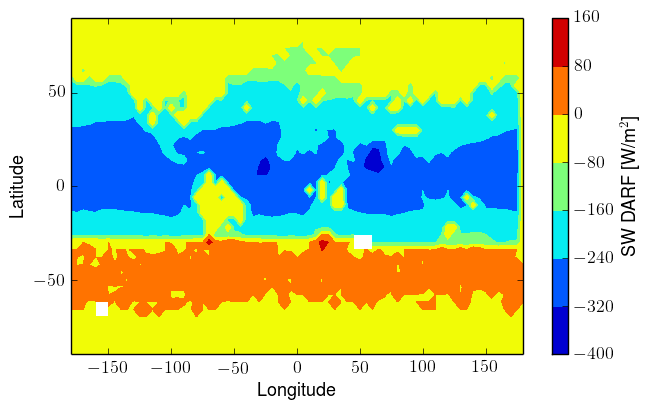

In [11]:
ctr = plt.contourf(mam['lon'][:,0],mam['lat'][:,0],mam['SW_DARF'][2,:,:])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(ctr)
cbar.set_label('SW DARF [W/m$^{2}$]')
#plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=11,c='k')
#plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=10,c=input_DJF['MODIS_COD_mean'][0,0])
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.savefig(fp+'plots/MAM_DARF_SW.png',dpi=600,transparent=True)

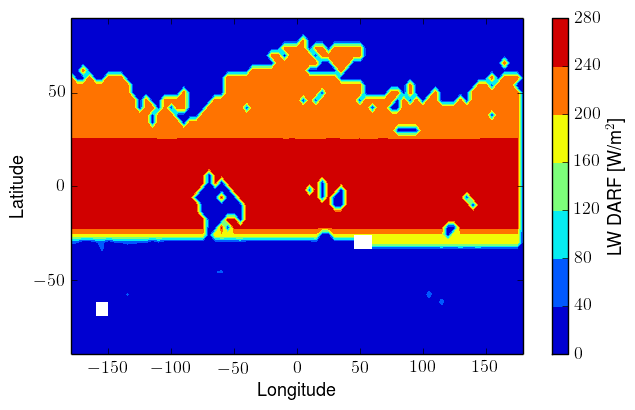

In [12]:
ctr = plt.contourf(mam['lon'][:,0],mam['lat'][:,0],mam['LW_DARF'][2,:,:])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(ctr)
cbar.set_label('LW DARF [W/m$^{2}$]')
#plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=11,c='k')
#plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=10,c=input_DJF['MODIS_COD_mean'][0,0])
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.savefig(fp+'plots/MAM_DARF_LW.png',dpi=600,transparent=True)

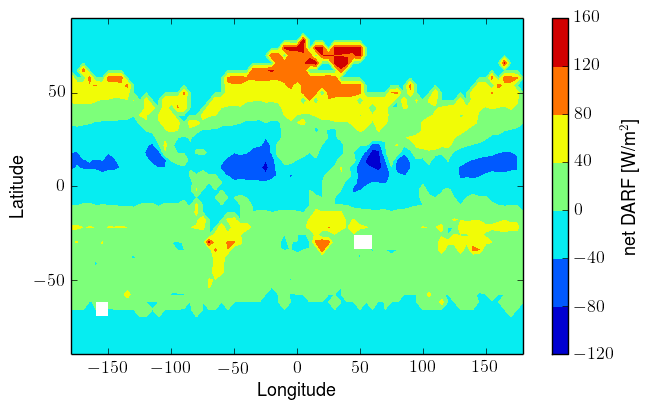

In [15]:
ctr = plt.contourf(mam['lon'][:,0],mam['lat'][:,0],mam['LW_DARF'][2,:,:]+mam['SW_DARF'][2,:,:])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(ctr)
cbar.set_label('net DARF [W/m$^{2}$]')
#plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=11,c='k')
#plt.scatter(MODIS_lon, MODIS_lat,marker='x',s=10,c=input_DJF['MODIS_COD_mean'][0,0])
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.savefig(fp+'plots/MAM_DARF_net.png',dpi=600,transparent=True)

In [54]:
def make_darf_plots(mam,mmm):
    fig,ax = plt.subplots(3,1,figsize=(6,13))
    ax.flatten()
    cl0 = np.linspace(-200,150,31)
    ctr = ax[0].contourf(mam['lon'][:,0],mam['lat'][:,0],mam['SW_DARF'][2,:,:],cl0,extend='both')
    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    cbar = plt.colorbar(ctr,ax=ax[0])
    cbar.set_label('SW DARF [W/m$^{2}$]')
    ax[0].set_xlim([-180,180])
    ax[0].set_ylim([-90,90])

    cl1 = np.linspace(0,150,31)
    ctr1 = ax[1].contourf(mam['lon'][:,0],mam['lat'][:,0],mam['LW_DARF'][2,:,:],cl1,cmap=plt.cm.gist_heat,extend='max')
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    cbar = plt.colorbar(ctr1,ax=ax[1])
    cbar.set_label('LW DARF [W/m$^{2}$]')
    ax[1].set_xlim([-180,180])
    ax[1].set_ylim([-90,90])

    cl2 = np.linspace(-150,150,41)
    ctr2 = ax[2].contourf(mam['lon'][:,0],mam['lat'][:,0],mam['SW_DARF'][2,:,:]+mam['LW_DARF'][2,:,:],cl2,cmap=plt.cm.RdBu,extend='both')
    ax[2].set_xlabel('Longitude')
    ax[2].set_ylabel('Latitude')
    cbar = plt.colorbar(ctr2,ax=ax[2])
    cbar.set_label('net DARF [W/m$^{2}$]')
    ax[2].set_xlim([-180,180])
    ax[2].set_ylim([-90,90])
    ax[0].set_title(mmm)

    plt.savefig(fp+'plots/'+mmm+'_DARF.png',dpi=600,transparent=True)


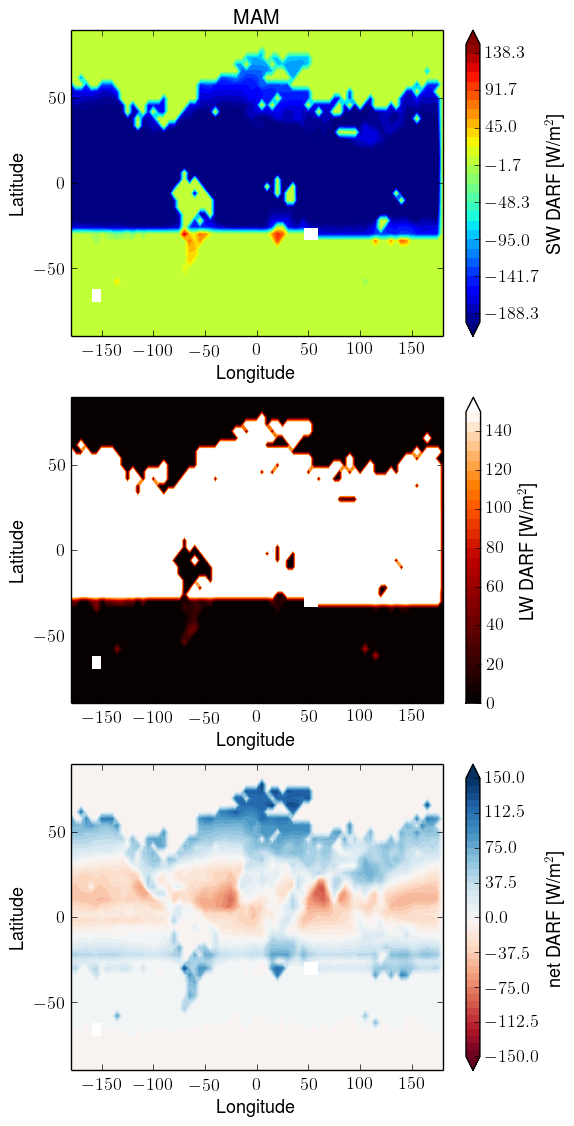

In [59]:
mam = sio.loadmat(fp+'DARF/MAM_DARF.mat')
make_darf_plots(mam,'MAM')

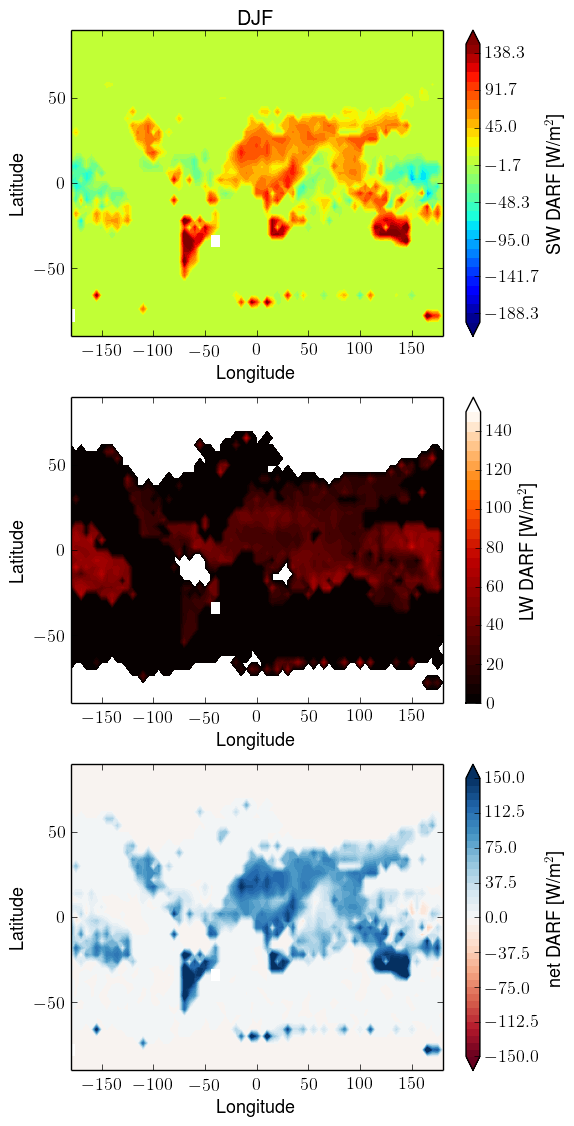

In [56]:
djf = sio.loadmat(fp+'DARF/DJF_DARF.mat')
make_darf_plots(djf,'DJF')

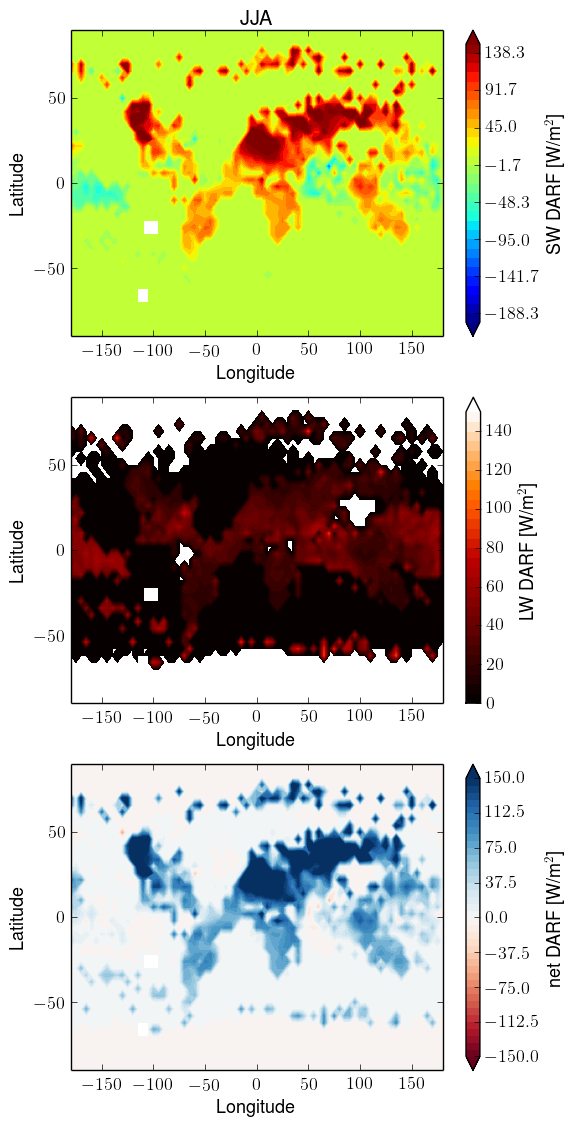

In [57]:
jja = sio.loadmat(fp+'DARF/JJA_DARF.mat')
make_darf_plots(jja,'JJA')

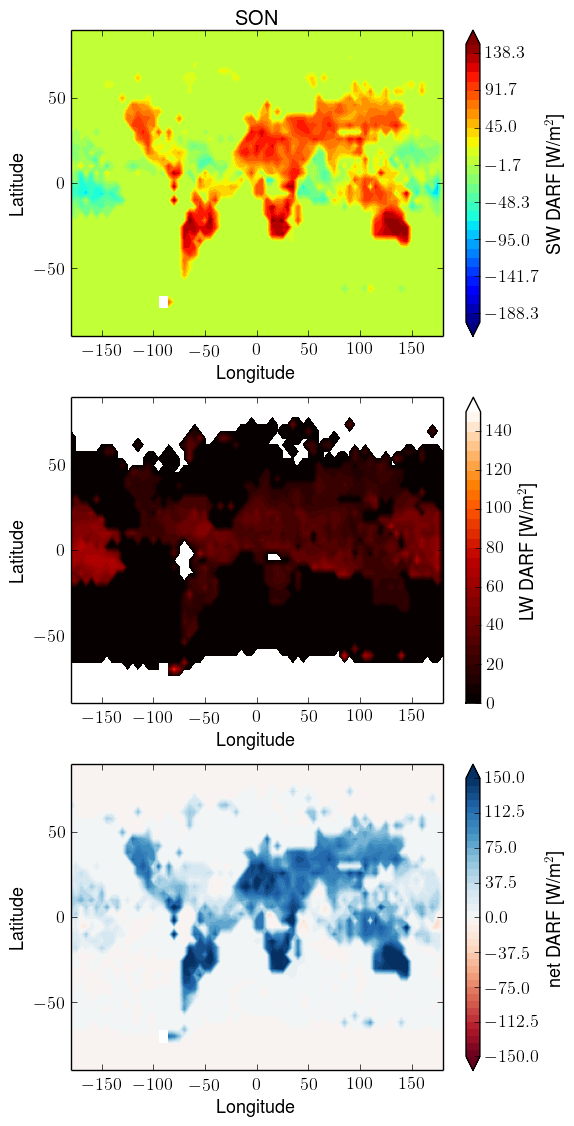

In [58]:
son = sio.loadmat(fp+'DARF/SON_DARF.mat')
make_darf_plots(son,'SON')

In [62]:
for ilat,lat in enumerate(mam['lon']):
    print ilat,lat

0 [-185]
1 [-180]
2 [-175]
3 [-170]
4 [-165]
5 [-160]
6 [-155]
7 [-150]
8 [-145]
9 [-140]
10 [-135]
11 [-130]
12 [-125]
13 [-120]
14 [-115]
15 [-110]
16 [-105]
17 [-100]
18 [-95]
19 [-90]
20 [-85]
21 [-80]
22 [-75]
23 [-70]
24 [-65]
25 [-60]
26 [-55]
27 [-50]
28 [-45]
29 [-40]
30 [-35]
31 [-30]
32 [-25]
33 [-20]
34 [-15]
35 [-10]
36 [-5]
37 [0]
38 [5]
39 [10]
40 [15]
41 [20]
42 [25]
43 [30]
44 [35]
45 [40]
46 [45]
47 [50]
48 [55]
49 [60]
50 [65]
51 [70]
52 [75]
53 [80]
54 [85]
55 [90]
56 [95]
57 [100]
58 [105]
59 [110]
60 [115]
61 [120]
62 [125]
63 [130]
64 [135]
65 [140]
66 [145]
67 [150]
68 [155]
69 [160]
70 [165]
71 [170]
72 [175]
73 [180]
74 [185]


(-15, -35)

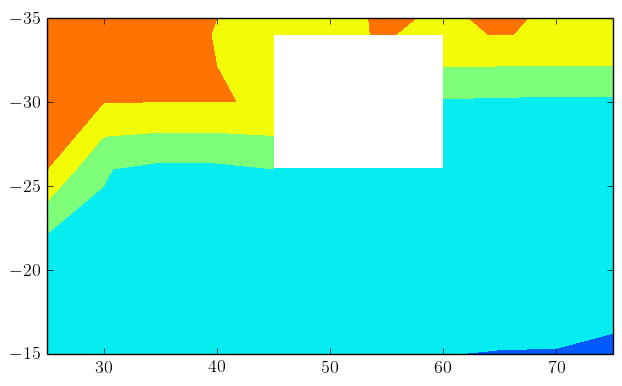

In [61]:
ctr = plt.contourf(mam['lon'][:,0],mam['lat'][:,0],mam['SW_DARF'][2,:,:])
plt.xlim(25,75)
plt.ylim(-15,-35)

In [77]:
mam_sw = sio.loadmat(fp+'DARF/AAC_MAM.mat')

In [78]:
mam_sw.keys()

['UTC',
 'LW_irr_up_utc',
 'lon',
 'SW_irr_dn_avg',
 'SW_irr_up_utc',
 '__header__',
 '__globals__',
 'LW_irr_dn_avg',
 'zout',
 'LW_irr_up_avg',
 'lat',
 'SW_irr_up_avg',
 '__version__',
 'SW_irr_dn_utc',
 'LW_irr_dn_utc']

<matplotlib.colorbar.Colorbar instance at 0x000000001B846508>

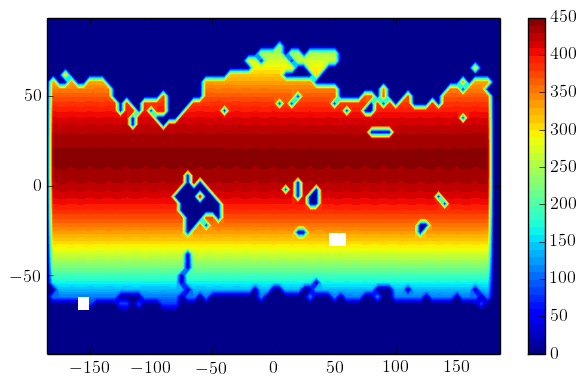

In [79]:
ctr = plt.contourf(mam_sw['lon'][:,0],mam_sw['lat'][:,0],mam_sw['SW_irr_dn_avg'][2,:,:],50)
plt.colorbar(ctr)

<matplotlib.colorbar.Colorbar instance at 0x0000000020144A88>

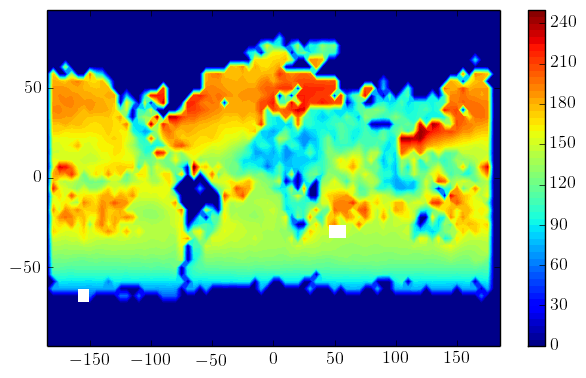

In [80]:
ctr = plt.contourf(mam_sw['lon'][:,0],mam_sw['lat'][:,0],mam_sw['SW_irr_up_avg'][2,:,:],50)
plt.colorbar(ctr)

<matplotlib.colorbar.Colorbar instance at 0x000000002081D208>

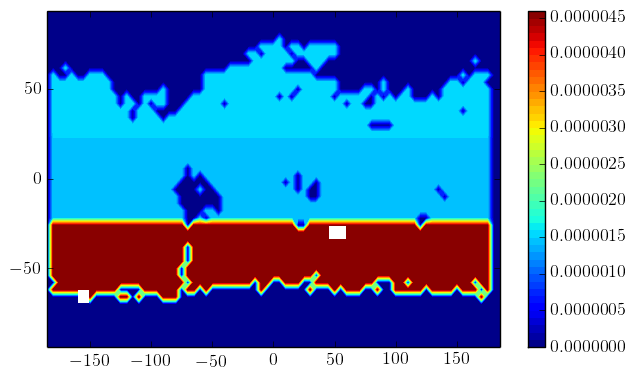

In [81]:
ctr = plt.contourf(mam_sw['lon'][:,0],mam_sw['lat'][:,0],mam_sw['LW_irr_dn_avg'][2,:,:],50)
plt.colorbar(ctr)

<matplotlib.colorbar.Colorbar instance at 0x00000000210ED648>

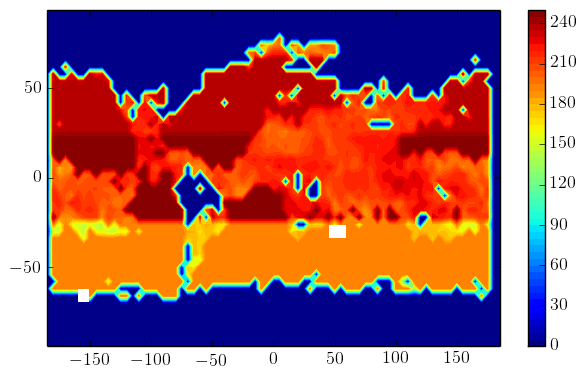

In [82]:
ctr = plt.contourf(mam_sw['lon'][:,0],mam_sw['lat'][:,0],mam_sw['LW_irr_up_avg'][2,:,:],50)
plt.colorbar(ctr)

In [72]:
mam_sw_cl= sio.loadmat(fp+'DARF/AAC_MAM_clear.mat')

<matplotlib.colorbar.Colorbar instance at 0x000000001B129088>

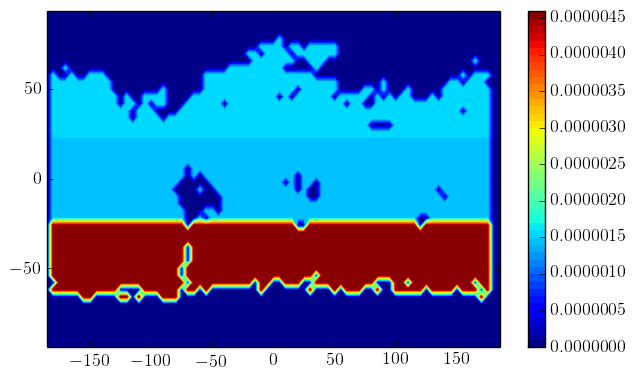

In [76]:
ctr = plt.contourf(mam_sw_cl['lon'][:,0],mam_sw_cl['lat'][:,0],mam_sw_cl['LW_irr_dn_avg'][2,:,:],50)
plt.colorbar(ctr)

## Check the difference when assuming kato2 vs. fu liou calculations

In [83]:
djf_fu = sio.loadmat(fp+'DARF/AAC_DJF.mat')
djf_kato = sio.loadmat(fp+'DARF/AAC_DJF_kato.mat')

In [84]:
djf_fu.keys()

['UTC',
 'LW_irr_up_utc',
 'lon',
 'SW_irr_dn_avg',
 'SW_irr_up_utc',
 '__header__',
 '__globals__',
 'LW_irr_dn_avg',
 'zout',
 'LW_irr_up_avg',
 'lat',
 'SW_irr_up_avg',
 '__version__',
 'SW_irr_dn_utc',
 'LW_irr_dn_utc']

In [85]:
djf_kato.keys()

['UTC',
 'LW_irr_up_utc',
 'lon',
 'SW_irr_dn_avg',
 'SW_irr_up_utc',
 '__header__',
 '__globals__',
 'LW_irr_dn_avg',
 'zout',
 'LW_irr_up_avg',
 'lat',
 'SW_irr_up_avg',
 '__version__',
 'SW_irr_dn_utc',
 'LW_irr_dn_utc']

In [89]:
djf_fu['SW_irr_up_avg'].shape

(3L, 48L, 75L)

<matplotlib.colorbar.Colorbar instance at 0x000000002930D048>

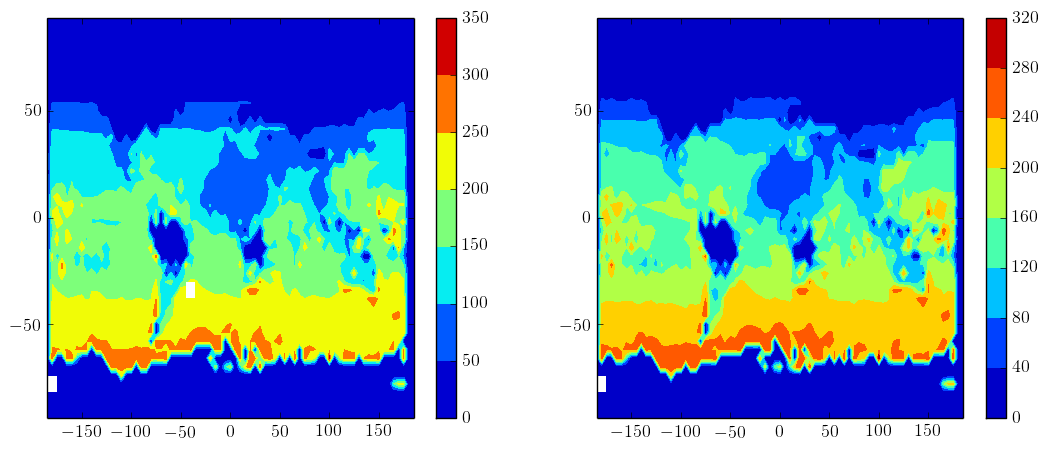

In [153]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
ctr = ax1.contourf(djf_fu['lon'][:,0],djf_fu['lat'][:,0],djf_fu['SW_irr_up_avg'][2,:,:])
plt.colorbar(ctr,ax=ax1)
ctr = ax2.contourf(djf_kato['lon'][:,0],djf_kato['lat'][:,0],djf_kato['SW_irr_up_avg'][2,:,:])
plt.colorbar(ctr,ax=ax2)

In [96]:
djf_dif = djf_fu['SW_irr_up_avg'][2,:,:]-djf_kato['SW_irr_up_avg'][2,:,:]

<matplotlib.colorbar.Colorbar instance at 0x0000000022BB4B08>

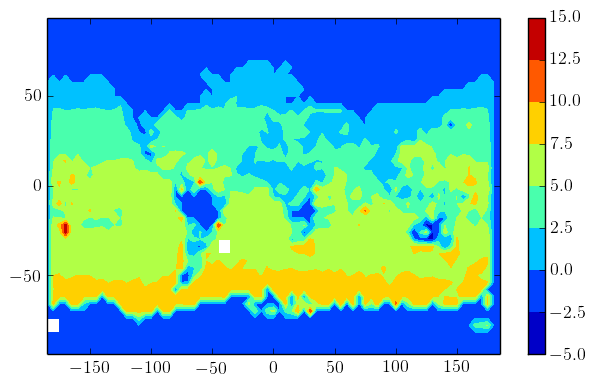

In [99]:
ctr = plt.contourf(djf_fu['lon'][:,0],djf_fu['lat'][:,0],djf_dif)
plt.colorbar(ctr)

In [104]:
dddjf = djf_dif.flatten()

In [109]:
from Sp_parameters import nanmasked

In [110]:
dddjf,idjf = nanmasked(djf_dif.flatten())

In [126]:
dddjf.shape

(3598L,)

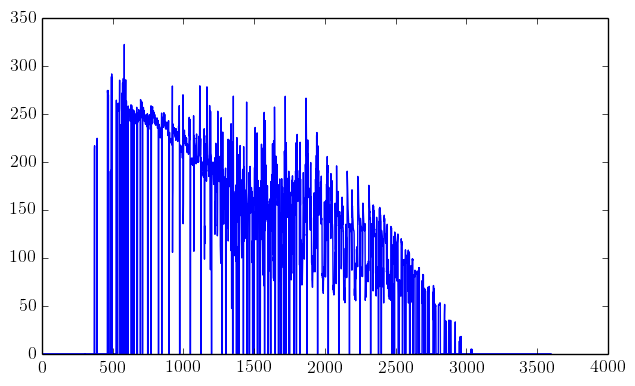

In [150]:
plt.plot(djf_fu['SW_irr_up_avg'][2,:,:].flatten())

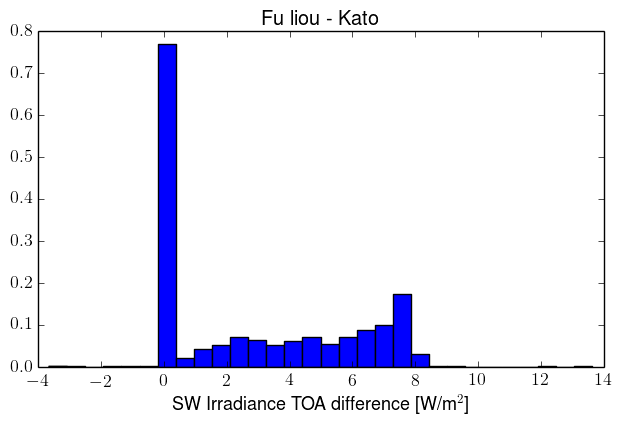

In [147]:
plt.hist(dddjf,normed=True,bins=30)
plt.xlabel('SW Irradiance TOA difference [W/m$^{2}$]')
plt.title('Fu liou - Kato')
plt.savefig(fp+'plots/diff_fuliou_kato.png',dpi=600,transparent=True)

In [151]:
djf_kato_clear = sio.loadmat(fp+'DARF/AAC_DJF_clear_kato.mat')
djf_fu_clear = sio.loadmat(fp+'DARF/AAC_DJF_clear.mat')

<matplotlib.colorbar.Colorbar instance at 0x0000000029931188>

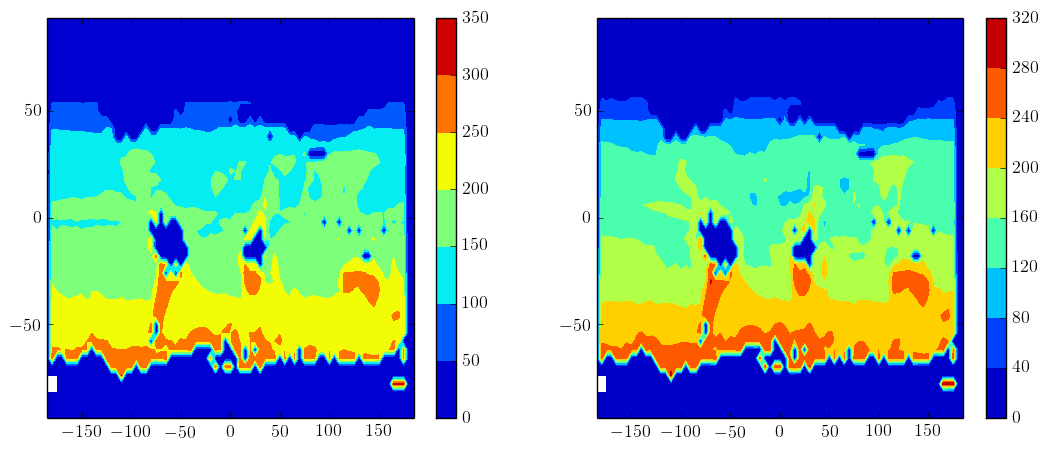

In [154]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
ctr = ax1.contourf(djf_fu_clear['lon'][:,0],djf_fu_clear['lat'][:,0],djf_fu_clear['SW_irr_up_avg'][2,:,:])
plt.colorbar(ctr,ax=ax1)
ctr = ax2.contourf(djf_kato_clear['lon'][:,0],djf_kato_clear['lat'][:,0],djf_kato_clear['SW_irr_up_avg'][2,:,:])
plt.colorbar(ctr,ax=ax2)

In [155]:
darf_kato = djf_kato['SW_irr_up_avg'][2,:,:] - djf_kato_clear['SW_irr_up_avg'][2,:,:]
darf_fu = djf_fu['SW_irr_up_avg'][2,:,:] - djf_fu_clear['SW_irr_up_avg'][2,:,:]

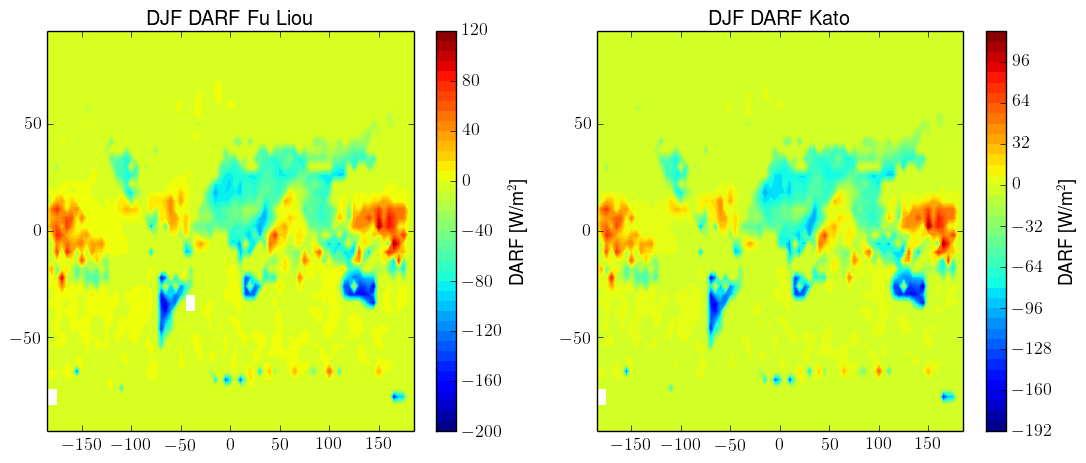

In [172]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
ctr = ax1.contourf(djf_fu_clear['lon'][:,0],djf_fu_clear['lat'][:,0],darf_fu,40)
cbr = plt.colorbar(ctr,ax=ax1)
cbr.set_label('DARF [W/m$^{2}$]')
ax1.set_title('DJF DARF Fu Liou')
ctr = ax2.contourf(djf_kato_clear['lon'][:,0],djf_kato_clear['lat'][:,0],darf_kato,40)
cbr = plt.colorbar(ctr,ax=ax2)
cbr.set_label('DARF [W/m$^{2}$]')
ax2.set_title('DJF DARF Kato')
plt.savefig(fp+'plots/DARF_fu_vs_kato.png',dpi=600,transparent=True)

In [157]:
dif_darf = darf_fu-darf_kato

In [193]:
clevels = np.linspace(-10,10,41)

In [195]:
clevels[20]

0.0

In [198]:
help(plt.contourf)

Help on function contourf in module matplotlib.pyplot:

contourf(*args, **kwargs)
    Plot contours.
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    :func:`~matplotlib.pyplot.contourf` differs from the MATLAB
    version in that it does not draw the polygon edges.
    To draw edges, add line contours with
    calls to :func:`~matplotlib.pyplot.contour`.
    
    
    Call signatures::
    
      contour(Z)
    
    make a contour plot of an array *Z*. The level values are chosen
    automatically.
    
    ::
    
      contour(X,Y,Z)
    
    *X*, *Y* specify the (x, y) coordinates of the surface
    
    ::
    
      contour(Z,N)
      contour(X,Y,Z,N)
    
    contour *N* automatically-chosen levels.
    
    ::
    
      contour(Z,V)
      contour(X,Y,Z,V)
    
    draw contour lines 

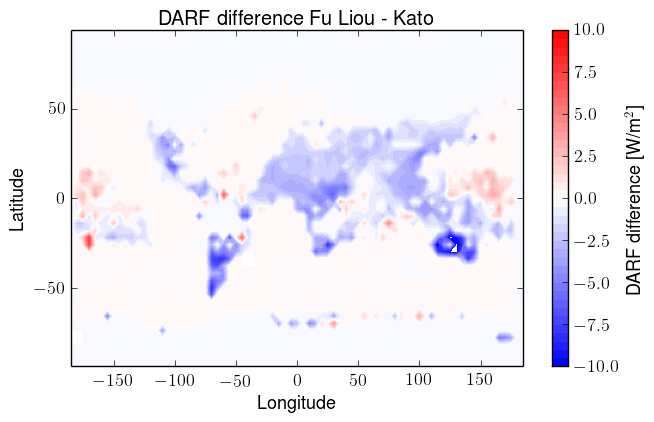

In [201]:

ctr = plt.contourf(djf_fu_clear['lon'][:,0],djf_fu_clear['lat'][:,0],dif_darf,levels=clevels,cmap=plt.cm.bwr)
cbr = plt.colorbar(ctr)
cbr.set_label('DARF difference [W/m$^{2}$]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DARF difference Fu Liou - Kato')
plt.savefig(fp+'plots/DARF_diff_lat_lon.png',dpi=600,transparent=True)

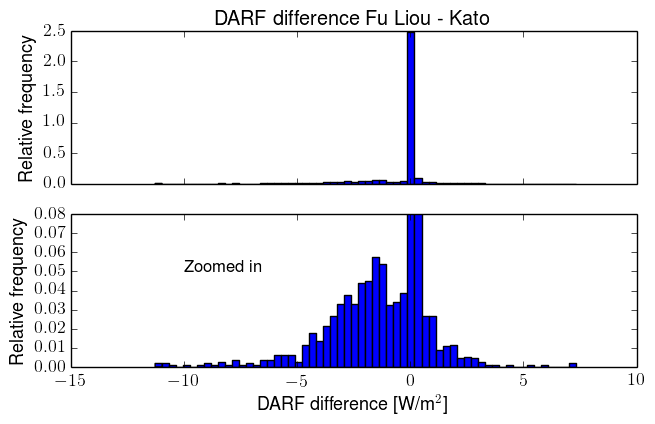

In [183]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.hist(nanmasked(dif_darf)[0],bins=60,normed=True)
ax1.set_title('DARF difference Fu Liou - Kato')
#ax1.set_xlabel('DARF difference [W/m$^{2}$]')
ax1.set_ylabel('Relative frequency')

ax2.hist(nanmasked(dif_darf)[0],bins=60,normed=True)
#ax2.set_title('DARF difference Fu Liou - Kato')
ax2.set_xlabel('DARF difference [W/m$^{2}$]')
ax2.set_ylabel('Relative frequency')
ax2.set_ylim([0,0.08])
ax2.text(-10,0.05,'Zoomed in')
plt.savefig(fp+'plots/DARF_difference_fu_kato.png',dpi=600,transparent=True)

(array([  5.58268896e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.58268896e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.58268896e-04,
          5.58268896e-04,   1.67480669e-03,   5.58268896e-04,
          5.58268896e-04,   1.67480669e-03,   1.67480669e-03,
          2.23307558e-03,   6.69922675e-03,   1.11653779e-02,
          9.76970568e-02,   9.58547694e-01,   2.67969070e-02,
          8.93230234e-03,   3.90788227e-03,   1.11653779e-03,
          1.11653779e-03,   1.11653779e-03,   5.58268896e-04,
          5.58268896e-04,   1.11653779e-03,   5.58268896e-04,
          0.00000000e+00,   0.00000000e+00,   5.58268896e-04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.58268896e-04,   0.00000000e+00,
        

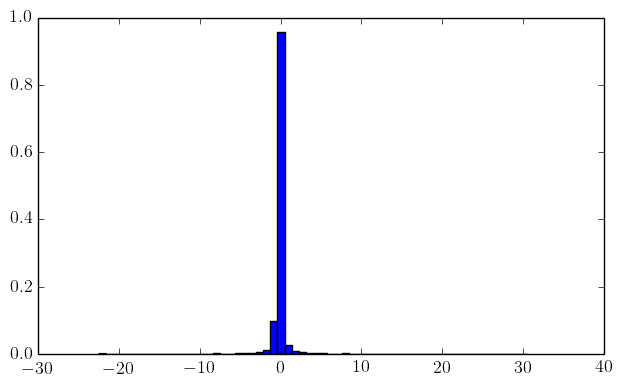

In [162]:
plt.hist(nanmasked(dif_darf/darf_kato)[0],bins=60,normed=True)

In [167]:
rms_darf = np.sqrt(np.nanmean(darf_fu**2-darf_kato**2))

In [168]:
rms_darf

8.1466952679382576